# 시험성적 데이터 분석

In [3]:
# 필요 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
# Jupyter Notebook에서 Matplotlib 출력을 위한 설정
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# Matplotlib 출력 크기 설정
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

2개반에 각각 6명의 학생

In [4]:
df_data = pd.read_excel('data/2_midterm.xlsx')
df_data

,반,이름,국어,영어,수학,과학
0,1,성춘향,67,87,90,98
1,1,이몽룡,45,45,56,98
2,1,향단이,95,59,96,88
3,1,방자,65,94,89,98
4,1,월매,45,65,78,98
5,1,변학도,78,76,98,89
6,2,홍길동,87,67,65,56
7,2,임꺽정,89,98,78,78
8,2,전우치,100,78,56,65
9,2,일지매,99,89,87,87


총점과 평균을 추가한 후, 평균으로 정렬

In [6]:
subjects = ['국어', '영어', '수학', '과학']
df_data['총점'] = df_data[subjects].sum(axis=1)
df_data['평균']= df_data['총점'] / len(subjects)
df_data.sort_values(['평균'], ascending=[False])

,반,이름,국어,영어,수학,과학,총점,평균
9,2,일지매,99,89,87,87,362,90.50
3,1,방자,65,94,89,98,346,86.50
7,2,임꺽정,89,98,78,78,343,85.75
0,1,성춘향,67,87,90,98,342,85.50
5,1,변학도,78,76,98,89,341,85.25
2,1,향단이,95,59,96,88,338,84.50
11,2,콩쥐,65,89,87,78,319,79.75
8,2,전우치,100,78,56,65,299,74.75
4,1,월매,45,65,78,98,286,71.50
6,2,홍길동,87,67,65,56,275,68.75


평균으로 내림차순 정렬
`이름` 필드를 기준으로 막대 그래프 생성

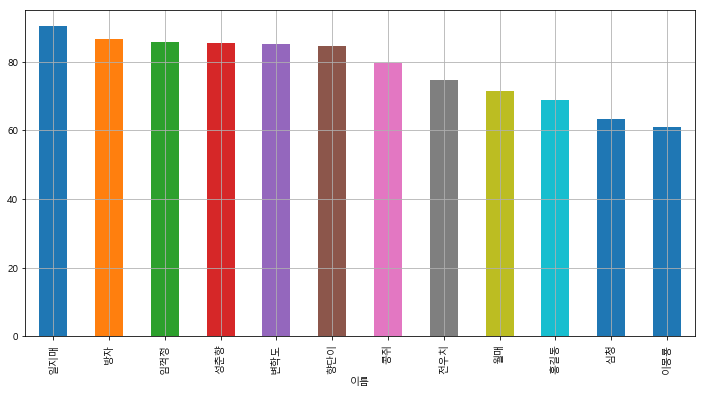

In [11]:
sorted_df_data = df_data.sort_values(['평균'], ascending=False)
sorted_df_data.index = sorted_df_data['이름']
sorted_df_data['평균'].plot(kind='bar', figsize=(12, 6))

2위 그룹..

In [ ]:
## 1반과 2반의 점수 비교

In [77]:
일반 = df_data[df['반'] == 1]
이반 = df_data[df['반'] == 2]
일반평균 = 일반['총점'].sum() / (6 * 4)
이반평균 = 이반['총점'].sum() / (6 * 4)
일반평균, 이반평균

(79.04166666666667, 77.125)

1반 평균 > 2반 평균
t-test를 이용한 검증

In [81]:
stats.ttest_ind(일반['평균'], 이반['평균'])

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

p value > 0.05

In [83]:
for subject in subjects:
    print(subject, stats.ttest_ind(일반[subject], 이반[subject]))

국어 Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영어 Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수학 Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과학 Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


과학 과목은 p value < 0.05

In [85]:
일반['과학'].sum() / 6, 이반['과학'].sum() / 6

(94.83333333333333, 69.66666666666667)

## 과목별 비교 

과목별로 특징 파악

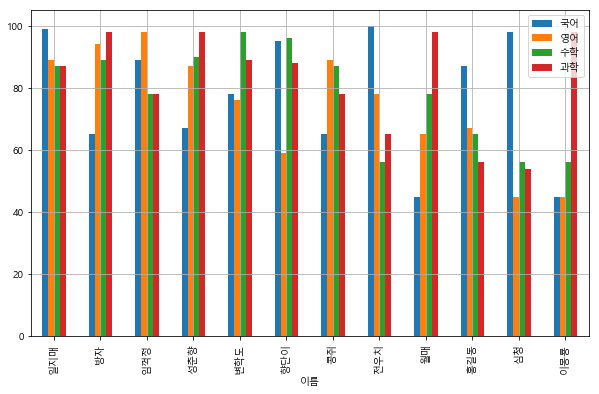

In [88]:
sorted_df_data[subjects].plot(kind='bar', stacked=False, figsize=(10, 6))

boxplot를 이용한 과목별 점수 분포

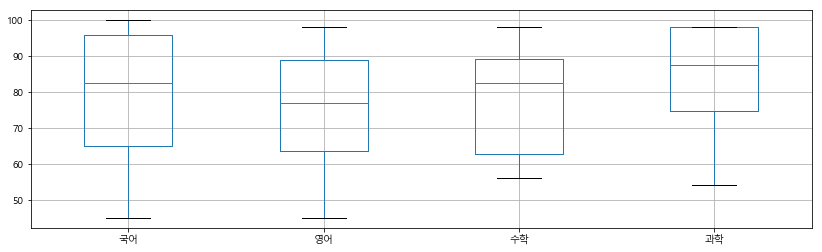

In [94]:
df_data[subjects].boxplot(return_type='axes')

반별 boxplot 작성

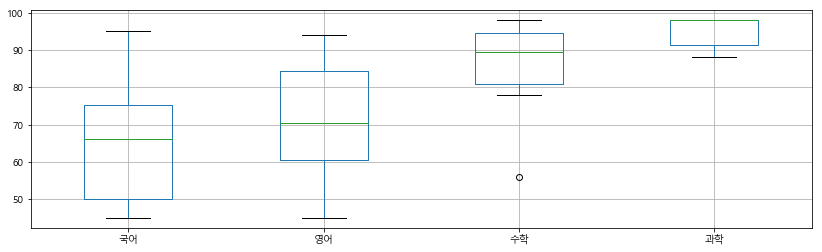

In [95]:
일반[subjects].boxplot(return_type='axes')

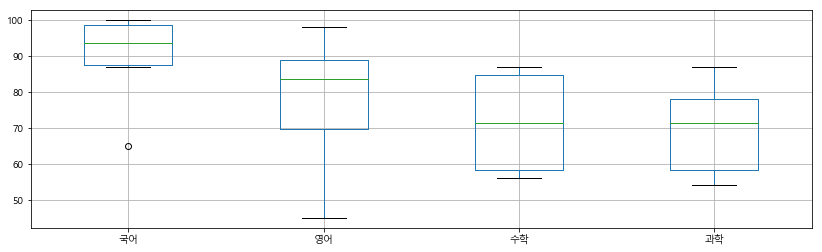

In [96]:
이반[subjects].boxplot(return_type='axes')

1반의 과학점수 그리고 2반의 국어점수

#### 과목별 상관도 

수학 점수와 과학 점수
국어 점수와 영어 점수...

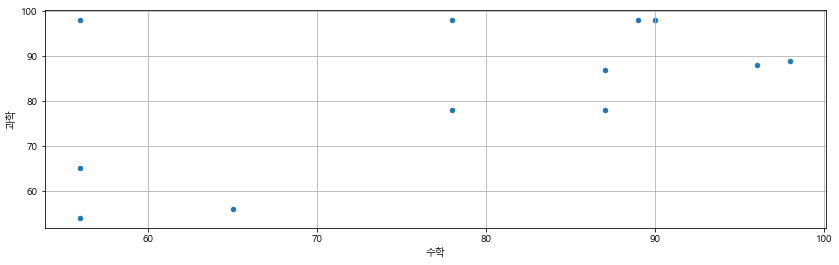

In [98]:
df_data.plot(kind='scatter', x='수학', y='과학')

피어슨 상관계수 산출

In [100]:
stats.pearsonr(df['수학'], df['과학'])

(0.5632890597067751, 0.05650580486155532)

In [ ]:
국어 점수와 영어 점수...

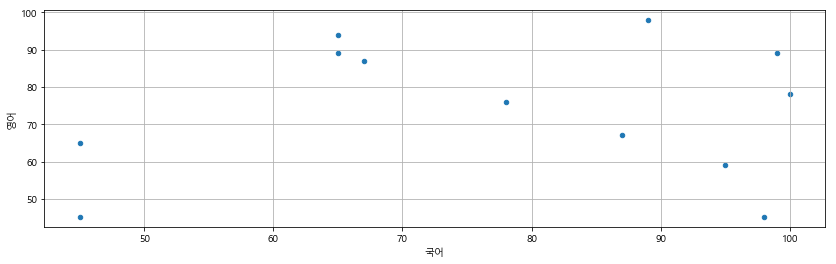

In [101]:
df.plot(kind='scatter', x='국어', y='영어')

In [102]:
stats.pearsonr(df['국어'], df['영어'])

(0.10566562777973997, 0.7437959551857836)

In [ ]:
## 학생별 성적 패턴 분석

학생별로 어떤 학생은 수학을 잘하면서 과학을 잘하지만 영어는 약할 수 있고, 또 어떤 학생은 다른 패턴으로 잘하는 과목에 대한 특징이 있을 수 있습니다. 학생들끼리 이러한 성적 패턴이 얼마나 비슷한지 비교해 볼 수 있을까요? 이를 확인할 수 있는 다양한 방법이 있습니다. 대표적인 방법으로 [주성분분석 (Principle component analysis)](https://ko.wikipedia.org/wiki/주성분_분석)이 있습니다. 학생별로 4과목이라는 특성을 두개로 축약한 후, 2차원 평면에 표시하면, 그 종합적인 차이를 한눈에 알 수 있습니다. 
4과목 성적 데이터에 대한 PCA 분석

In [103]:
df[subjects]

,국어,영어,수학,과학
0,67,87,90,98
1,45,45,56,98
2,95,59,96,88
3,65,94,89,98
4,45,65,78,98
5,78,76,98,89
6,87,67,65,56
7,89,98,78,78
8,100,78,56,65
9,99,89,87,87


정규화

In [104]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df[subjects])
X_std

array([[-0.55809652,  0.72621778,  0.78954203,  1.01066629],
       [-1.70024754, -1.68176748, -1.44749373,  1.01066629],
       [ 0.89555023, -0.87910573,  1.18431305,  0.36897341],
       [-0.66192843,  1.12754865,  0.72374686,  1.01066629],
       [-1.70024754, -0.53510783,  0.        ,  1.01066629],
       [ 0.01297899,  0.09555497,  1.31590339,  0.43314269],
       [ 0.48022259, -0.42044187, -0.8553372 , -1.68444381],
       [ 0.5840545 ,  1.35688058,  0.        , -0.27271947],
       [ 1.15513001,  0.21022093, -1.44749373, -1.10692022],
       [ 1.10321405,  0.84088374,  0.59215653,  0.30480412],
       [ 1.0512981 , -1.68176748, -1.44749373, -1.81278239],
       [-0.66192843,  0.84088374,  0.59215653, -0.27271947]])

StandardScaler() 함수 적용

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Y = pca.fit_transform(X_std)
Y

array([[-1.56591653, -0.09168753, -0.11829912],
       [ 0.11774518,  2.93515218, -0.15891778],
       [-0.20727166, -0.38845514,  1.70470084],
       [-1.71984653, -0.24234692, -0.47855431],
       [-1.11185524,  1.70512415, -0.13182574],
       [-1.03327136, -0.43547978,  0.76140396],
       [ 1.88205338, -0.20323602, -0.26828181],
       [-0.10118555, -1.27408337, -0.76729937],
       [ 1.88020684, -0.64411706, -0.69991167],
       [-0.39554448, -1.36047251,  0.22700591],
       [ 2.98704605,  0.37256038,  0.48013242],
       [-0.7321601 , -0.37295837, -0.55015334]])

`Y` 변수에 4과목(4차원)을 2차원으로 축약한 데이터 값(제1주성분, 제2주성분) 저장  

In [110]:
pca_df = pd.DataFrame(Y)
pca_df.index = df.index
pca_df.columns = ['PC1', 'PC2']
df2 = pd.concat([df, pca_df], axis=1)
df2

,반,이름,국어,영어,수학,과학,총점,평균,PC1,PC2,PC3
0,1,성춘향,67,87,90,98,342,85.50,-1.565917,-0.091688,-0.118299
1,1,이몽룡,45,45,56,98,244,61.00,0.117745,2.935152,-0.158918
2,1,향단이,95,59,96,88,338,84.50,-0.207272,-0.388455,1.704701
3,1,방자,65,94,89,98,346,86.50,-1.719847,-0.242347,-0.478554
4,1,월매,45,65,78,98,286,71.50,-1.111855,1.705124,-0.131826
5,1,변학도,78,76,98,89,341,85.25,-1.033271,-0.435480,0.761404
6,2,홍길동,87,67,65,56,275,68.75,1.882053,-0.203236,-0.268282
7,2,임꺽정,89,98,78,78,343,85.75,-0.101186,-1.274083,-0.767299
8,2,전우치,100,78,56,65,299,74.75,1.880207,-0.644117,-0.699912
9,2,일지매,99,89,87,87,362,90.50,-0.395544,-1.360473,0.227006


In [ ]:
PC1, PC2 값으로 scatter plot 작성

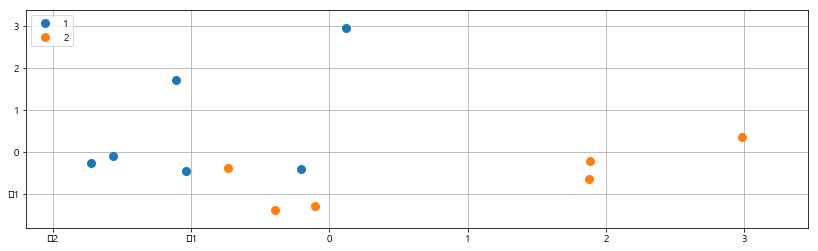

In [111]:
def draw_groups(groups, loc):
    fig, ax = plt.subplots()
    ax.margins(0.1)

    for name, group in groups:
        ax.plot(group['PC1'], group['PC2'], marker='o', linestyle='', ms=8, label=name)

    ax.legend(numpoints=1, loc=loc)
    
draw_groups(df2.groupby('반'), loc='upper left')

`PC1 < 0, PC2 <0` 에 있는(7명) 학생들이 유사한 패턴

##### End of Document